In [7]:
import scipy as sp
import matplotlib.pyplot as plotter
%matplotlib inline

In [2]:
t = sp.arange(0,1,0.001)

In [3]:
x = 0.33*sp.cos(2*sp.pi*10*t) - 0.1*sp.cos(2*sp.pi*3*10*t) + 0.05*sp.cos(2*sp.pi*5*10*t)

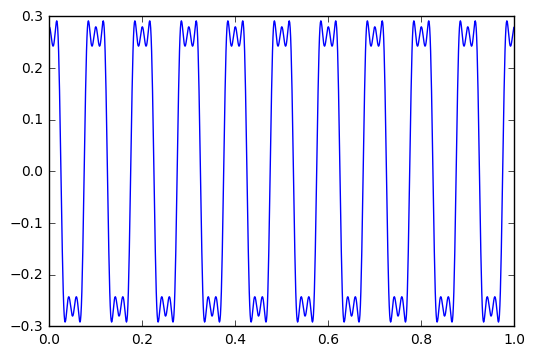

In [8]:
plotter.plot(t,x)

<Container object of 3 artists>

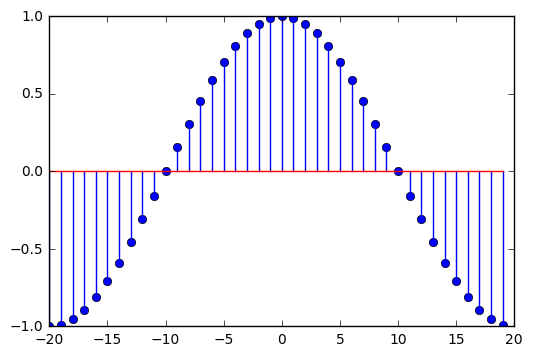

In [9]:
# Slow and fast sinusoidal signals
N = 40
n = sp.arange(-20,20,1)
k = 1
x= sp.cos(2*sp.pi * k / N * n)
plotter.stem(n,x)

<Container object of 3 artists>

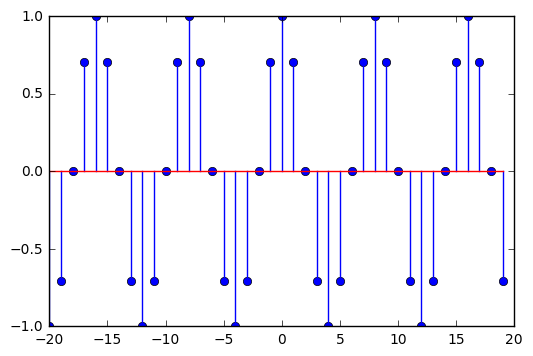

In [10]:
k = 5
x = sp.cos(2*pi*k/N*n)
plotter.stem(n,x)

<Container object of 3 artists>

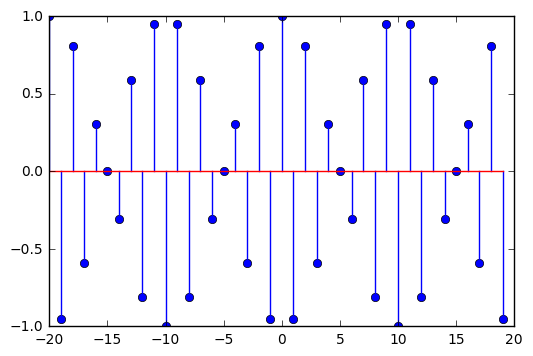

In [11]:
k = 18
x = sp.cos(2*pi*k/N*n)
plotter.stem(n,x)

# Signal filtering (Low-pass, High-pass, Band-pass, Band-Stop)

In [19]:
# You can refer to Discrete Fourier transforms in the documentation
# scipy.fftpack -> we will use fft now - Fast Fourier Transform

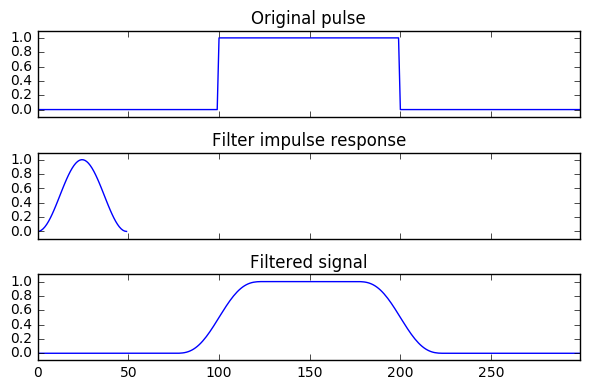

In [18]:
# Smooth square pulse using Hann window
from scipy import signal
sig = np.repeat([0.,1.,0.],100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

import matplotlib.pyplot as plotter
fig, (ax_orig, ax_win, ax_filt) = plotter.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0,  0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()

In [20]:
# You can refer to the 5.20 Signal Processing of the documentation (scipy.signal)
# and convolution for the next part

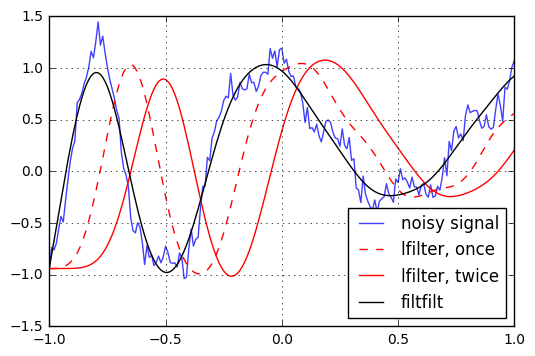

In [21]:
# lfilter command 
from scipy import signal
import matplotlib.pyplot as plotter
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t)+2.1) + 0.1*np.sin(2*np.pi*1.25*t+1) + 0.18*np.cos(2*np.pi*3.85*t))
xn = x+ np.random.randn(len(t)) * 0.08
# butterworth filter
b, a = signal.butter(3, 0.05)
# initial filter condition
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
# applying the filter again to have filter of the same order
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
# now we apply the filter
y = signal.filtfilt(b, a, xn)
# Now we plot the signal
plotter.figure
plotter.plot(t, xn, 'b', alpha=0.75)
plotter.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plotter.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), loc='best')
plotter.grid(True)

# Butter command

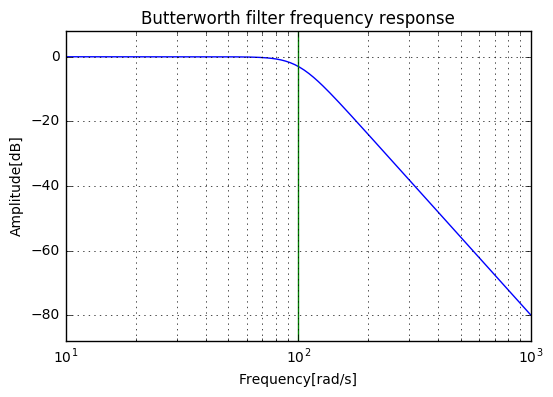

In [22]:
from scipy import signal
import matplotlib.pyplot as plotter

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plotter.semilogx(w, 20*np.log10(abs(h)))
plotter.title('Butterworth filter frequency response')
plotter.xlabel('Frequency[rad/s]')
plotter.ylabel('Amplitude[dB]')
plotter.margins(0, 0.1)
plotter.grid(which='both', axis='both')
plotter.axvline(100, color='green') #cutoff frequency